# Visualization libraries and examples


Today's focus in examples is going to be on visualization and plotting, as well as some examples of libraries and functions that should aid in evaluating numerical results.

Much of what we're going to be discussing are visualizations in more than one dimension. We've already used and discussed examples of histograms and simple line plots, which are essentially trivial to use in Python. Today, though, we'll get more in depth on some examples of doing more involved plotting that will be useful for some of the physics coming up.

First, let's import the libraries as usual. We will the numerical functions as well as the plotting functions

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Example using a 2D histogram and a color bar

Use colorbar by specifying the mappable object (here the AxesImage returned by imshow) and the axes to attach the colorbar to.

Some of the functions used here are:

* [matplotlib.axes.Axes.imshow](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow)
* [matplotlib.pyplot.imshow](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow)
* [matplotlib.figure.Figure.colorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.colorbar)
* [matplotlib.pyplot.colorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar)
* [numpy.mgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mgrid.html)
* [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)

One of the things we will mention below is the `Axes` object.

Indeed, one of the fundamental objects in the plotting is the `Axes` class, which actually contains almost all of the primary elements of the figure:

* [matplotlib axes API](https://matplotlib.org/api/axes_api.html)

The `Axes` contains most of the figure elements: `Axis`, `Tick`, `Line2D`, `Text`, `Polygon`, etc., and sets the coordinate system. You can directly manipulate just about everything about the figure this way.

As you will see in this example, we can use this to add very interesting and important information to a figure.

[Text(0, 0.5, 'y-label two'), Text(0.5, 0, 'x-label two')]

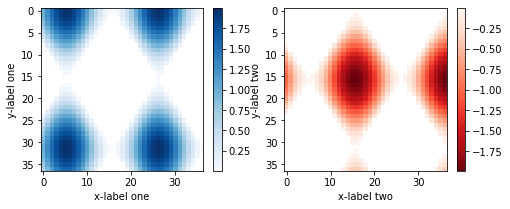

In [11]:
# setup some generic data
N    = 37                               # Size of grid in each dimension
x, y = np.mgrid[:N, :N]                 # Instantiate grids
Z    = (np.cos(x*0.2) + np.sin(y*0.3))

# mask out the negative and positive values, respectively
Zpos = np.ma.masked_less(Z, 0)    # LEFT PLOT
Zneg = np.ma.masked_greater(Z, 0) # RIGHT PLOT

# here, what you get is an entire figure object, 
# as well as axis objects for each of the two subplots created
fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
# imshow essentially just plots the values of the array that you have handed it
pos = ax1.imshow(Zpos, cmap='Blues', interpolation='none')

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax1)

# repeat everything above for the negative data
neg = ax2.imshow(Zneg, cmap='Reds_r', interpolation='none')
fig.colorbar(neg, ax=ax2)

ax1.set(xlabel='x-label one', ylabel='y-label one')
ax2.set(xlabel='x-label two', ylabel='y-label two')

#### Meshgrids

Before we get go any furhter, I just want to comment on the `meshgrid` function here. 

The purpose of a `meshgrid` is to create a rectangular grid out of an array of `x` values and an array of `y` values. 

If you think about it, grids of values are a bit tricky because we need a 2D array of points, where each point is specified by 2 coordinates. So, one way to think of it, is as a pair of 2D arrays or matrices.

For example, if we want to create a grid where we have a 2D coordinate specification `(x,y)` at each integer value between 0 and 4 in both the `x` and `y` directions. To create a rectangular grid, we need every combination of the `x` and `y` points.

This is going to be 25 points, right? So if we wanted to create an `x` and `y` array for all of these points, we could do the following:

~~~~
x[0,0] = 0    y[0,0] = 0
x[0,1] = 1    y[0,1] = 0
x[0,2] = 2    y[0,2] = 0
x[0,3] = 3    y[0,3] = 0
x[0,4] = 4    y[0,4] = 0
x[1,0] = 0    y[1,0] = 1
x[1,1] = 1    y[1,1] = 1
...
x[4,3] = 3    y[4,3] = 4
x[4,4] = 4    y[4,4] = 4
~~~~

This would result in the following x and y matrices, such that the pairing of the corresponding element in each matrix gives the x and y coordinates of a point in the grid.

~~~~
x =   0 1 2 3 4        y =   0 0 0 0 0
      0 1 2 3 4              1 1 1 1 1
      0 1 2 3 4              2 2 2 2 2
      0 1 2 3 4              3 3 3 3 3
      0 1 2 3 4              4 4 4 4 4
~~~~

Then, if we pair each of the corresponding indices in `x` and `y` we get a grid of points in 2 dimensions.

Of course, we could be a bit more clever and do instead:

ndarray holding my values:
[0 1 2 3 4]

Here are my two 2D arrays:
[array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4])]
[[0, 0, 0, 0, 0], [1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4]]


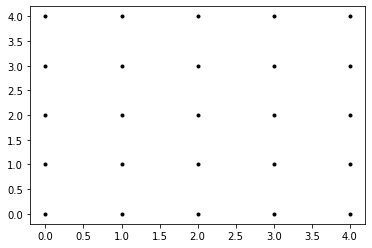

In [12]:
# Set the size of each dimension
size = 5

# Create an array of integers from 0 to size-1
myrange = np.arange(0,size)

# Make sure that this is the array that we want
print("ndarray holding my values:")
print(myrange)

# Now "manually" build these 2D arrays, or matrices
xx = [myrange for y in myrange] 
yy = [[y for x in myrange] for y in myrange]

# Check that these match what we want
print("\nHere are my two 2D arrays:")
print(xx)
print(yy)

# Now plot this and see if we get our nice grid
plt.plot(xx, yy, marker='.', color='k', linestyle='none')

#### Using the `mgrid` function in `numpy`

Instead of all of the above, we can get this in one line using `mgrid`:

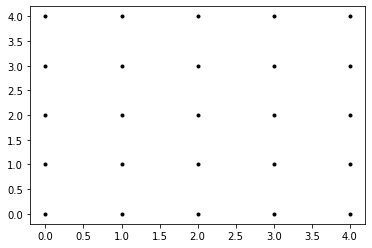

In [13]:
xx_mgrid, yy_mgrid = np.mgrid[0:5,0:5]
plt.plot(xx_mgrid, yy_mgrid, marker='.', color='k', linestyle='none')

#### Using `mgrid` to sample a function across a grid of values

The benefit of the use of this kind of grid creation, is that we can *sample* functions across the entire grid very very quickly.

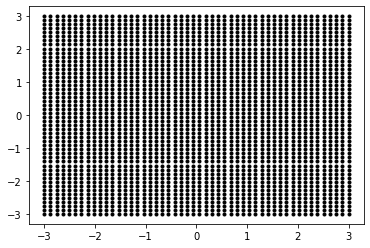

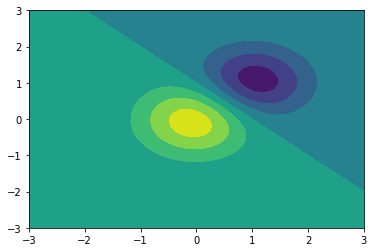

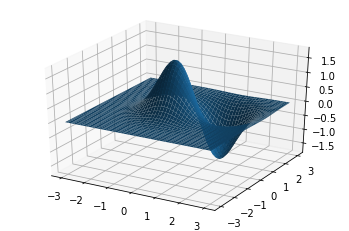

In [14]:
ncoords    = 50j
coordrange = 3
# This tells mgrid to create 100 points between 0 - 1
xgrid, ygrid = np.mgrid[-1*coordrange:coordrange:ncoords, \
                        -1*coordrange:coordrange:ncoords]  

plt.plot(xgrid, ygrid, marker='.', color='k', linestyle='none')
plt.show()
z1 = np.exp(-xgrid**2 - ygrid**2)
z2 = np.exp(-(xgrid - 1)**2 - (ygrid - 1)**2)
z = (z1 - z2) * 2

plt.contourf(xgrid,ygrid,z)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid,ygrid,z)

Note that the `subplot()` command specifies `numrows, numcols, fignum` where `fignum` ranges from 1 to `numrows*numcols`. The commas in the subplot command are optional if `numrows*numcols<10`. So `subplot(211)` is identical to `subplot(2, 1, 1)`. You can create an arbitrary number of subplots and axes.

With that out of the way, let's get to creating some basic plots to 

### Multiple images using a 2D histogram (i.e. grid)

This makes a set of images with a single colormap, norm, and colorbar.

In this example, you should become familiar with making multiple figures in a single image using the `subplots` functions in `pyplot` 

Some of the libraries used here are:

* [matplotlib.axes.Axes.imshow](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow)
* [matplotlib.pyplot.imshow](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow)
* [matplotlib.figure.Figure.colorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.colorbar)
* [matplotlib.pyplot.colorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar)
* [matplotlib.colors.Normalize](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.colors.Normalize.html#matplotlib.colors.Normalize)
* [matplotlib.cm.ScalarMappable.set_cmap](https://matplotlib.org/2.2.3/api/cm_api.html#matplotlib.cm.ScalarMappable.set_cmap)
* [matplotlib.cm.ScalarMappable.set_norm](https://matplotlib.org/2.2.3/api/cm_api.html#matplotlib.cm.ScalarMappable.set_norm)
* [matplotlib.cm.ScalarMappable.set_clim](https://matplotlib.org/2.2.3/api/cm_api.html#matplotlib.cm.ScalarMappable.set_clim)
* [matplotlib.cbook.CallbackRegistry.connect](https://matplotlib.org/2.2.3/api/cbook_api.html#matplotlib.cbook.CallbackRegistry.connect)

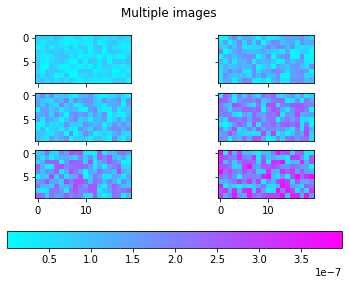

In [15]:
from matplotlib import colors

np.random.seed(19680801)
Nr = 3
Nc = 2
cmap = "cool"

fig, axs = plt.subplots(Nr, Nc)
fig.suptitle('Multiple images')

# Array to hold the images
images = []

# Loop over the plots and fill them with random numbers
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = ((1 + i + j) / 10) * np.random.rand(10, 20) * 1e-6
        images.append(axs[i, j].imshow(data, cmap=cmap))
        axs[i, j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

# Setup a color bar to map the colors on to numerical values
fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)


# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)

### Creating annotated heatmaps

It is often desirable to show data which depends on two independent variables as a color coded image plot. This is often referred to as a *heatmap*. If the data is categorical, this would be called a categorical heatmap. Matplotlib's `imshow` function makes production of such plots particularly easy.

The following examples show how to create a heatmap with annotations. We will start with an easy example and expand it to be usable as a universal function.

#### A simple categorical heatmap

We may start by defining some data. What we need is a 2D list or array which defines the data to color code. We then also need two lists or arrays of categories; of course the number of elements in those lists need to match the data along the respective axes. The heatmap itself is an `imshow` plot with the labels set to the categories we have. Note that it is important to set both, the tick locations (`set_xticks`) as well as the tick labels (`set_xticklabels`), otherwise they would become out of sync. The locations are just the ascending integer numbers, while the ticklabels are the labels to show. Finally we can label the data itself by creating a Text within each cell showing the value of that cell.

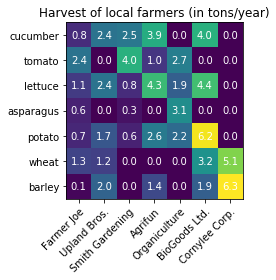

In [16]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()

### Interpolations for imshow/matshow

This example displays the difference between interpolation methods for `imshow()` and `matshow()`.

If interpolation is None, it defaults to the `image.interpolation` rc parameter. If the interpolation is `'none'`, then no interpolation is performed for the Agg, ps and pdf backends. Other backends will default to `'nearest'`.

For the Agg, ps and pdf backends, `interpolation = 'none'` works well when a big image is scaled down, while `interpolation = 'nearest'` works well when a small image is scaled up.

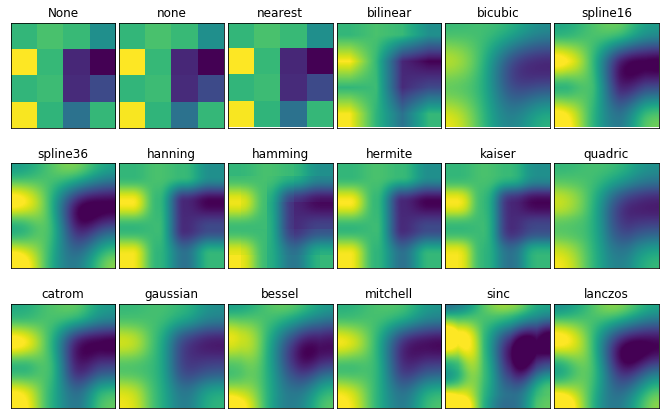

In [17]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9.3, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()

### General 3D plots

It's very easy to make 3D plots using the library introduced briefly above. 

For 3D plots, one needs an `Axes3D` object. This is created just like any other axes using the `projection=‘3d’` keyword. Create a new `matplotlib.figure.Figure` and add a new axes to it of type `Axes3D`:

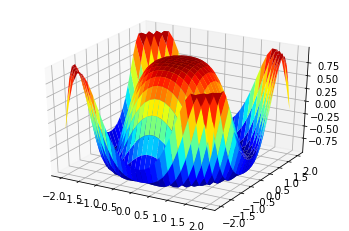

In [18]:
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T
z = np.cos(x ** 2 + y ** 2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)